In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
data=pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [4]:
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.0,32.0,NaN,NaN,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.3,32.3,NaN,NaN,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,31.8,31.8,NaN,NaN,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.6,33.6,NaN,NaN,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.8,32.8,NaN,NaN,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [6]:
data.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID             

### Features having null values

In [7]:
null=data.isnull().sum()[data.isnull().sum()!=0]/len(data)*100
null

Data_Value_Unit               100.000000
Data_Value                      9.450854
Data_Value_Alt                  9.450854
Data_Value_Footnote_Symbol     90.549146
Data_Value_Footnote            90.549146
Low_Confidence_Limit            9.450854
High_Confidence_Limit           9.450854
Sample_Size                     9.450854
Total                          96.428304
Age(years)                     78.577315
Education                      85.713215
Gender                         92.856608
Income                         74.998127
Race/Ethnicity                 71.426431
GeoLocation                     1.887923
dtype: float64

### Its better to drop columns with more than 50% of null values

Here columns -"Data_Value_Unit","Data_Value_Footnote_Symbol","Data_Value_Footnote ","Total","Age(years) ","Education",
"Gender","Income","Race/Ethnicity" having more than 70% null values

In [8]:
columns=null[null>50].index

In [9]:
columns

Index(['Data_Value_Unit', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity'],
      dtype='object')

In [10]:
def not_null(data_columns,columns):
    x=[i for i in data_columns if i not in columns]
    return x

In [11]:
d=not_null(data.columns,columns)
d

['YearStart',
 'YearEnd',
 'LocationAbbr',
 'LocationDesc',
 'Datasource',
 'Class',
 'Topic',
 'Question',
 'Data_Value_Type',
 'Data_Value',
 'Data_Value_Alt',
 'Low_Confidence_Limit',
 'High_Confidence_Limit ',
 'Sample_Size',
 'GeoLocation',
 'ClassID',
 'TopicID',
 'QuestionID',
 'DataValueTypeID',
 'LocationID',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategoryId1',
 'StratificationID1']

In [12]:
df1=data[d]

### Dataset with features having null values less than 50%

In [13]:
df1.isnull().sum()

YearStart                       0
YearEnd                         0
LocationAbbr                    0
LocationDesc                    0
Datasource                      0
Class                           0
Topic                           0
Question                        0
Data_Value_Type                 0
Data_Value                   5046
Data_Value_Alt               5046
Low_Confidence_Limit         5046
High_Confidence_Limit        5046
Sample_Size                  5046
GeoLocation                  1008
ClassID                         0
TopicID                         0
QuestionID                      0
DataValueTypeID                 0
LocationID                      0
StratificationCategory1         0
Stratification1                 0
StratificationCategoryId1       0
StratificationID1               0
dtype: int64

### Droping null values and duplicates

In [14]:
df1.dropna(inplace=True)
df2=df1.drop_duplicates()

C:\Users\akku\AppData\Local\Temp\ipykernel_14096\798808919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [15]:
df1.reset_index(drop=True)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.0,32.0,30.5,33.5,7304.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.3,32.3,29.9,34.7,2581.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,31.8,31.8,30.0,33.6,4723.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.6,33.6,29.9,37.6,1153.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.8,32.8,30.2,35.6,2402.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47333,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,13.3,13.3,8.0,21.2,212.0,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Income,"$75,000 or greater",INC,INC75PLUS
47334,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,25.3,25.3,16.4,37.0,137.0,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Income,Data not reported,INC,INCNR
47335,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,18.3,18.3,10.8,29.2,154.0,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
47336,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,24.1,24.1,19.9,28.9,820.0,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Non-Hispanic Black,RACE,RACEBLK


#### Check if YearStart and YearEnd is the same

In [16]:
(df1.YearEnd==df1.YearEnd).all()

True

In [17]:
locations=data.LocationDesc.unique()

### Dropping features not needed
1. Data_Value_Type, DataValueTypeID have only one unique value so drop those rows
2. Data_Value, Data_Value_Alt values are same
3. We can get location from LocationID so we can drop LocationDesc, LocationAbbr
4. We can drop Topic, Class, ClassID as we can get it from TopicID
5. Drop Question, QuestionID, DataSource
6. Drop StratificationCategory1, StratificationCategoryId1, Stratification1

In [18]:
df1.Data_Value_Type.unique()

array(['Value'], dtype=object)

In [19]:
df1.DataValueTypeID.unique()

array(['VALUE'], dtype=object)

In [20]:
(df1.Data_Value==df1.Data_Value_Alt).all()

True

In [21]:
df1.TopicID.unique()

array(['OWS1', 'FV1', 'PA1'], dtype=object)

In [22]:
df1.ClassID.unique()

array(['OWS', 'FV', 'PA'], dtype=object)

In [23]:
df1.YearStart.unique()

array([2011, 2012, 2014, 2013, 2015, 2016], dtype=int64)

In [24]:
df1.drop(["YearEnd","LocationDesc","Datasource","Topic","StratificationCategory1","StratificationCategoryId1","Stratification1","Class","Question","QuestionID","Data_Value_Type","Data_Value_Alt","DataValueTypeID","ClassID","LocationAbbr"],inplace=True,axis=1)

C:\Users\akku\AppData\Local\Temp\ipykernel_14096\1892375856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(["YearEnd","LocationDesc","Datasource","Topic","StratificationCategory1","StratificationCategoryId1","Stratification1","Class","Question","QuestionID","Data_Value_Type","Data_Value_Alt","DataValueTypeID","ClassID","LocationAbbr"],inplace=True,axis=1)


In [25]:
df1.rename(columns={"YearStart":"Year"})

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,TopicID,LocationID,StratificationID1
0,2011,32.0,30.5,33.5,7304.0,"(32.84057112200048, -86.63186076199969)",OWS1,1,OVERALL
1,2011,32.3,29.9,34.7,2581.0,"(32.84057112200048, -86.63186076199969)",OWS1,1,MALE
2,2011,31.8,30.0,33.6,4723.0,"(32.84057112200048, -86.63186076199969)",OWS1,1,FEMALE
3,2011,33.6,29.9,37.6,1153.0,"(32.84057112200048, -86.63186076199969)",OWS1,1,EDUHS
4,2011,32.8,30.2,35.6,2402.0,"(32.84057112200048, -86.63186076199969)",OWS1,1,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...
53382,2016,13.3,8.0,21.2,212.0,"(18.335765, -64.896335)",PA1,78,INC75PLUS
53383,2016,25.3,16.4,37.0,137.0,"(18.335765, -64.896335)",PA1,78,INCNR
53384,2016,18.3,10.8,29.2,154.0,"(18.335765, -64.896335)",PA1,78,RACEWHT
53385,2016,24.1,19.9,28.9,820.0,"(18.335765, -64.896335)",PA1,78,RACEBLK


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47338 entries, 0 to 53386
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YearStart               47338 non-null  int64  
 1   Data_Value              47338 non-null  float64
 2   Low_Confidence_Limit    47338 non-null  float64
 3   High_Confidence_Limit   47338 non-null  float64
 4   Sample_Size             47338 non-null  float64
 5   GeoLocation             47338 non-null  object 
 6   TopicID                 47338 non-null  object 
 7   LocationID              47338 non-null  int64  
 8   StratificationID1       47338 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [27]:
df1.isnull().sum()

YearStart                 0
Data_Value                0
Low_Confidence_Limit      0
High_Confidence_Limit     0
Sample_Size               0
GeoLocation               0
TopicID                   0
LocationID                0
StratificationID1         0
dtype: int64

### Geolocation gives Longitude and latitude, so we can separate them as longitude and latitude

In [28]:
df1.GeoLocation=df1.GeoLocation.apply(lambda x:x[1:-1])
df1

C:\Users\akku\AppData\Local\Temp\ipykernel_14096\2081161945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.GeoLocation=df1.GeoLocation.apply(lambda x:x[1:-1])


,YearStart,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,TopicID,LocationID,StratificationID1
0,2011,32.0,30.5,33.5,7304.0,"32.84057112200048, -86.63186076199969",OWS1,1,OVERALL
1,2011,32.3,29.9,34.7,2581.0,"32.84057112200048, -86.63186076199969",OWS1,1,MALE
2,2011,31.8,30.0,33.6,4723.0,"32.84057112200048, -86.63186076199969",OWS1,1,FEMALE
3,2011,33.6,29.9,37.6,1153.0,"32.84057112200048, -86.63186076199969",OWS1,1,EDUHS
4,2011,32.8,30.2,35.6,2402.0,"32.84057112200048, -86.63186076199969",OWS1,1,EDUHSGRAD
...,...,...,...,...,...,...,...,...,...
53382,2016,13.3,8.0,21.2,212.0,"18.335765, -64.896335",PA1,78,INC75PLUS
53383,2016,25.3,16.4,37.0,137.0,"18.335765, -64.896335",PA1,78,INCNR
53384,2016,18.3,10.8,29.2,154.0,"18.335765, -64.896335",PA1,78,RACEWHT
53385,2016,24.1,19.9,28.9,820.0,"18.335765, -64.896335",PA1,78,RACEBLK


In [29]:
df1[["longitude","latitude"]]=df1.GeoLocation.apply(lambda x: list(map(float,x.split(",")))).tolist()

C:\Users\akku\AppData\Local\Temp\ipykernel_14096\4147742597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["longitude","latitude"]]=df1.GeoLocation.apply(lambda x: list(map(float,x.split(",")))).tolist()
C:\Users\akku\AppData\Local\Temp\ipykernel_14096\4147742597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["longitude","latitude"]]=df1.GeoLocation.apply(lambda x: list(map(float,x.split(",")))).tolist()


In [30]:
df1.drop("GeoLocation",axis=1,inplace=True)

C:\Users\akku\AppData\Local\Temp\ipykernel_14096\2290513375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("GeoLocation",axis=1,inplace=True)


In [31]:
df1

,YearStart,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,TopicID,LocationID,StratificationID1,longitude,latitude
0,2011,32.0,30.5,33.5,7304.0,OWS1,1,OVERALL,32.840571,-86.631861
1,2011,32.3,29.9,34.7,2581.0,OWS1,1,MALE,32.840571,-86.631861
2,2011,31.8,30.0,33.6,4723.0,OWS1,1,FEMALE,32.840571,-86.631861
3,2011,33.6,29.9,37.6,1153.0,OWS1,1,EDUHS,32.840571,-86.631861
4,2011,32.8,30.2,35.6,2402.0,OWS1,1,EDUHSGRAD,32.840571,-86.631861
...,...,...,...,...,...,...,...,...,...,...
53382,2016,13.3,8.0,21.2,212.0,PA1,78,INC75PLUS,18.335765,-64.896335
53383,2016,25.3,16.4,37.0,137.0,PA1,78,INCNR,18.335765,-64.896335
53384,2016,18.3,10.8,29.2,154.0,PA1,78,RACEWHT,18.335765,-64.896335
53385,2016,24.1,19.9,28.9,820.0,PA1,78,RACEBLK,18.335765,-64.896335


In [32]:
df2.rename(columns={"YearStart":"Year"},inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x27df53ffdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x27df54742b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27df53ffb20>],
 'medians': [<matplotlib.lines.Line2D at 0x27df54747f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27df5474a90>],
 'means': []}

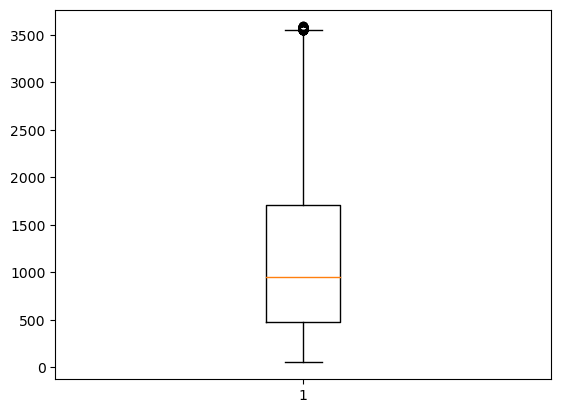

In [33]:
df2=df2[df2.Sample_Size<df1.Sample_Size.quantile(.85)]
plt.boxplot(df2.Sample_Size)

In [34]:
df2

,Year,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.3,32.3,29.9,34.7,2581.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.6,33.6,29.9,37.6,1153.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.8,32.8,30.2,35.6,2402.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD
5,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.8,33.8,31.0,36.8,1925.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Some college or technical school,EDU,EDUCOTEC
6,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,26.4,26.4,23.7,29.3,1812.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,College graduate,EDU,EDUCOGRAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53382,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,13.3,13.3,8.0,21.2,212.0,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Income,"$75,000 or greater",INC,INC75PLUS
53383,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,25.3,25.3,16.4,37.0,137.0,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Income,Data not reported,INC,INCNR
53384,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,18.3,18.3,10.8,29.2,154.0,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
53385,2016,2016,VI,Virgin Islands,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,Value,24.1,24.1,19.9,28.9,820.0,"(18.335765, -64.896335)",PA,PA1,Q047,VALUE,78,Race/Ethnicity,Non-Hispanic Black,RACE,RACEBLK


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40237 entries, 1 to 53386
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       40237 non-null  int64  
 1   YearEnd                    40237 non-null  int64  
 2   LocationAbbr               40237 non-null  object 
 3   LocationDesc               40237 non-null  object 
 4   Datasource                 40237 non-null  object 
 5   Class                      40237 non-null  object 
 6   Topic                      40237 non-null  object 
 7   Question                   40237 non-null  object 
 8   Data_Value_Type            40237 non-null  object 
 9   Data_Value                 40237 non-null  float64
 10  Data_Value_Alt             40237 non-null  float64
 11  Low_Confidence_Limit       40237 non-null  float64
 12  High_Confidence_Limit      40237 non-null  float64
 13  Sample_Size                40237 non-null  flo

#### Split features and labeled values

In [36]:
x=df2.drop("Data_Value",axis=1)
y=df2.Data_Value

### Getting numerical and categorical values

In [37]:
num_col=x.select_dtypes(include=["int64","float64"]).columns
cat_col=x.select_dtypes(include=["object"]).columns

In [38]:
num_col

Index(['Year', 'YearEnd', 'Data_Value_Alt', 'Low_Confidence_Limit',
       'High_Confidence_Limit ', 'Sample_Size', 'LocationID'],
      dtype='object')

In [39]:
cat_col

Index(['LocationAbbr', 'LocationDesc', 'Datasource', 'Class', 'Topic',
       'Question', 'Data_Value_Type', 'GeoLocation', 'ClassID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

### Split x into train and test

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

### Creating pipeline

In [41]:
scaler=StandardScaler()
ohe=OneHotEncoder()

In [42]:
num_pipeline=make_pipeline(scaler)
num_pipeline

Pipeline(steps=[('standardscaler', StandardScaler())])

In [43]:
cat_pipeline=make_pipeline(ohe)

### Creating column transformer

In [44]:
col_transform=ColumnTransformer([("num",num_pipeline,num_col),("cat",ohe,cat_col)])

### x_train column transform

In [45]:
x_train_final=col_transform.fit_transform(x_train)

In [46]:
x_train_final

<30177x270 sparse matrix of type '<class 'numpy.float64'>'
	with 694071 stored elements in Compressed Sparse Row format>

### Training linear regression model

In [47]:
reg=LinearRegression()

In [48]:
reg.fit(x_train_final.toarray(),y_train)

LinearRegression()

### x_test column transform

In [49]:
x_test_final=col_transform.fit_transform(x_test)
x_test_final

<10060x270 sparse matrix of type '<class 'numpy.float64'>'
	with 231380 stored elements in Compressed Sparse Row format>

In [50]:
reg.score(x_test_final.toarray(),y_test)

0.9997121875014532

### The model is giving 99% accuracy